#**Mushroom Classification** - Data Visualization

###1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

###2. Load dataset and handle missing data

In [ ]:
# Load the dataset from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(url, header=None)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing values with the mode
df.iloc[:, 11].fillna(df.iloc[:, 11].mode()[0], inplace=True)

<ipython-input-2-7842fc50c2e7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:, 11].fillna(df.iloc[:, 11].mode()[0], inplace=True)


###4. Encode categorical features

In [ ]:
# Encode all categorical features using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

###5. Correlation Matrix visualization

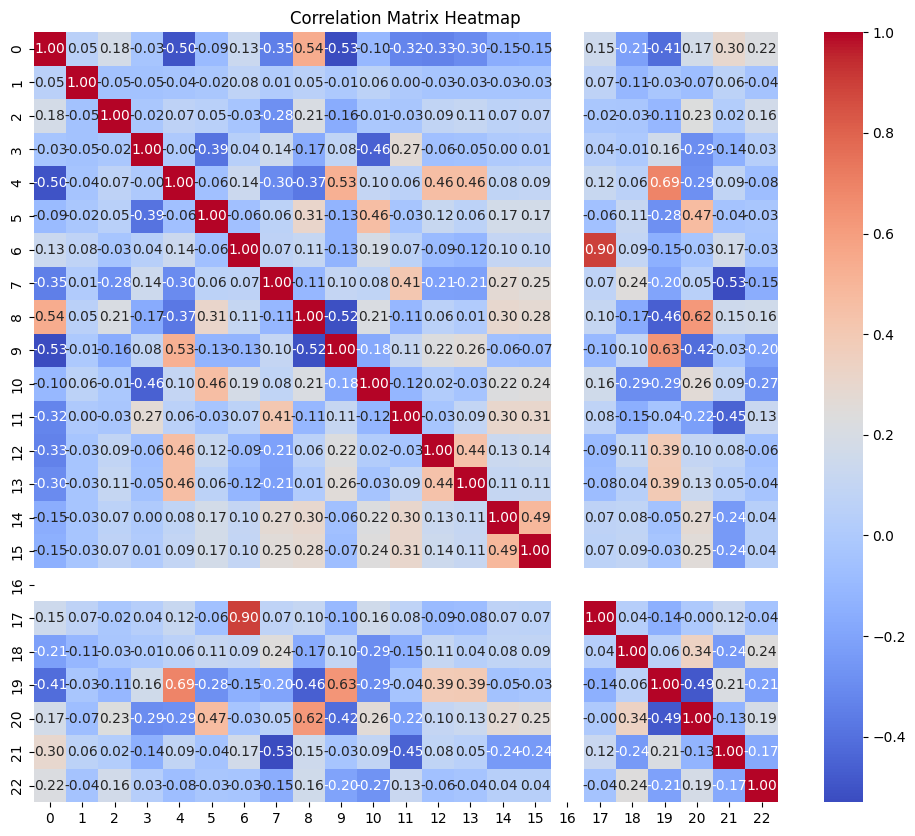

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

###6. Class distribution

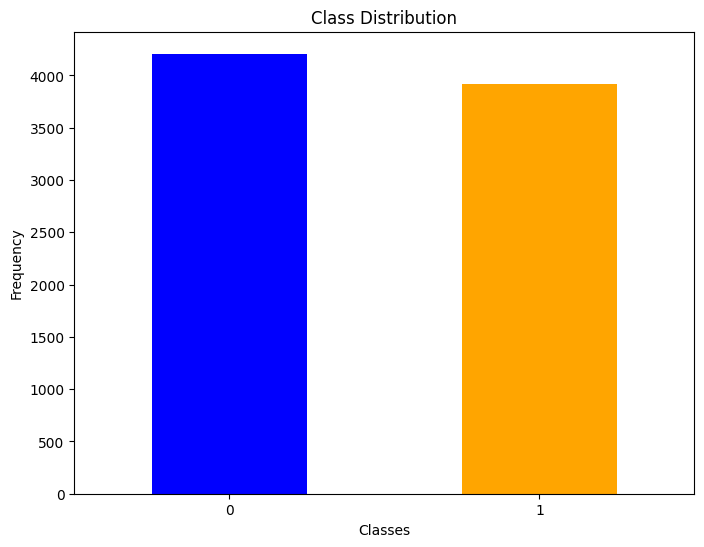

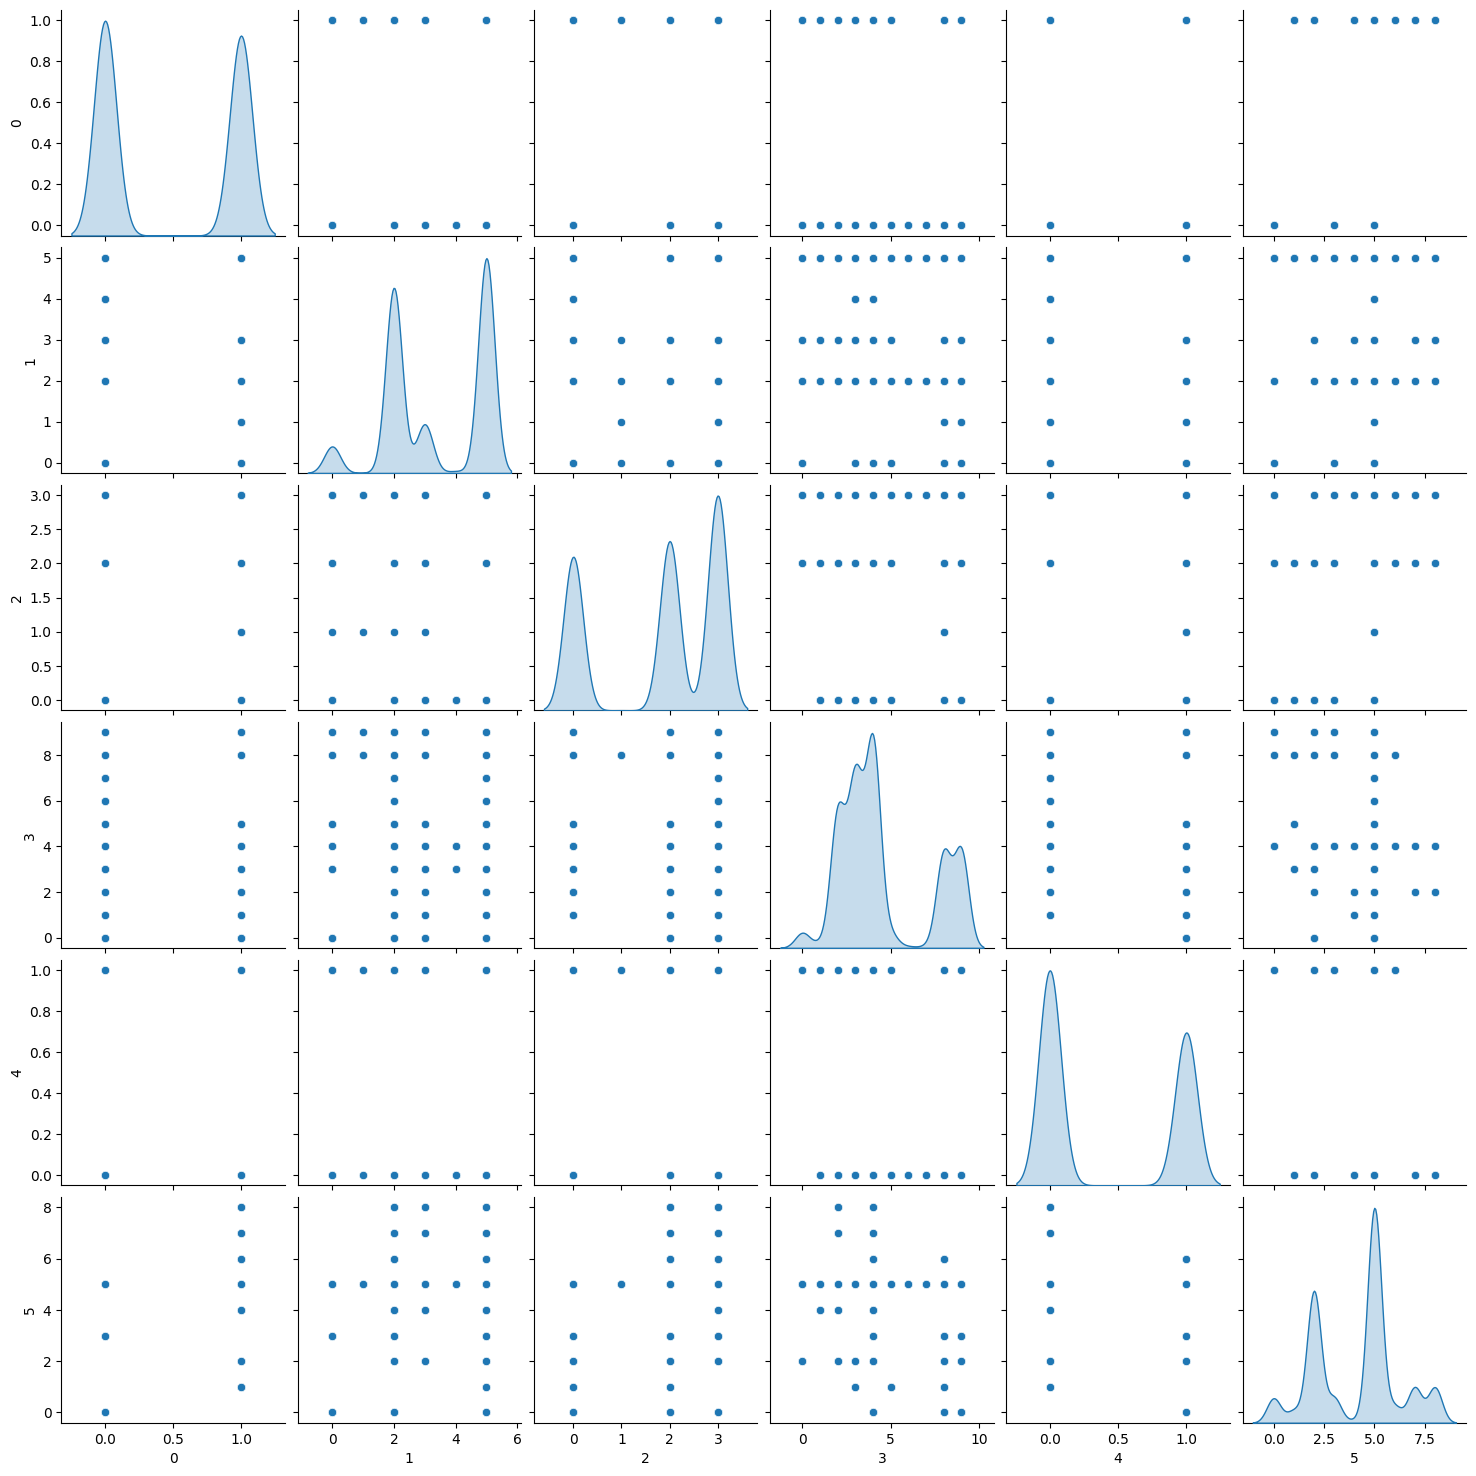

In [ ]:
# Visualize class distribution (check data balance)
y = df.iloc[:, 0]  # Target variable (first column)
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df.iloc[:, :6], diag_kind="kde")  # Using a subset of features for clarity
plt.show()

###7. Boxplots for outliers

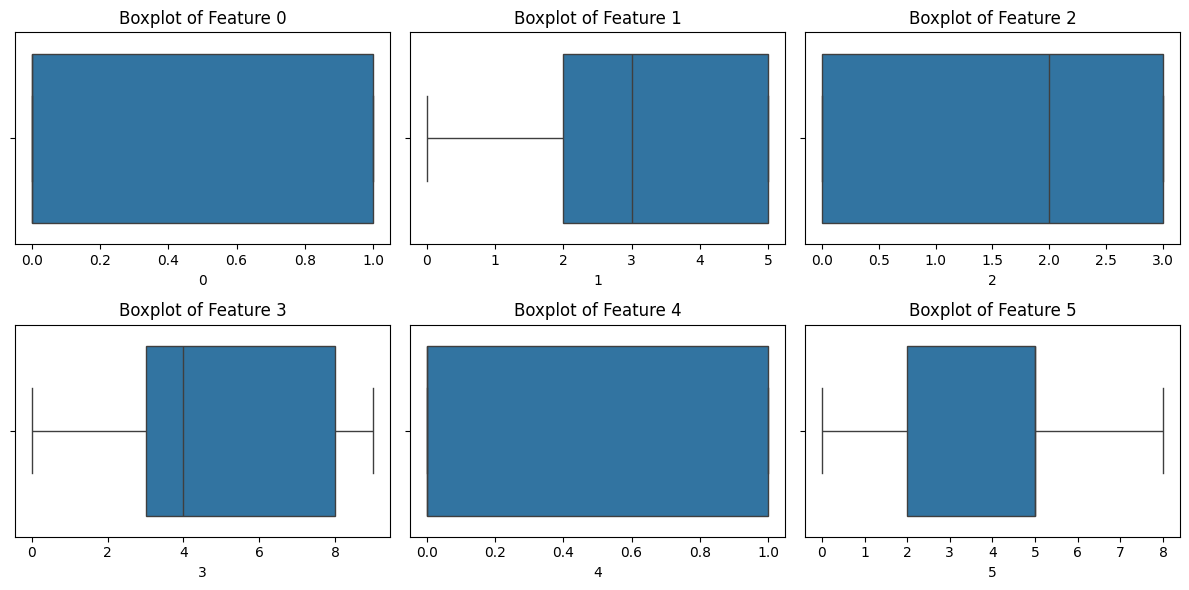

In [ ]:
# Boxplots to detect outliers in a few features
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:6]):  # Visualize the first 6 features
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of Feature {col}")
plt.tight_layout()
plt.show()